# **Data Loading and Initial Inspection**
- Loaded dataset with approximately 3,500 apartment listings in Tehran  
- Inspected first few rows to understand data structure and column types  
- Checked for missing values and data types of each column  
- Generated basic statistical summaries for numerical features like `Room`, `Price`, and `Price(USD)`  

**Key points:** 
- Dataset contains 8 columns: `Area`, `Room`, `Parking`, `Warehouse`, `Elevator`, `Address`, `Price`, and `Price(USD)`  
- Missing values found in `Address` column (23 rows)  
- `Area` column loaded as object type, indicating data quality issues  
- Boolean columns (`Parking`, `Warehouse`, `Elevator`) are correctly typed as boolean  

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('../data/housePrice.csv')

In [9]:
df.shape

(3479, 8)

In [4]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [6]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [7]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [8]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

---
# **Exploratory Data Analysis (EDA)**
Performed visual analysis to understand the distribution of features and relationships within the dataset.

**Key findings:**

- **Area and Price Distributions:**  
  Both `Area` and `Price` distributions are right-skewed. This is common in real estate datasets where a small number of properties are significantly larger or more expensive than the majority.

- **Outliers:**  
  Boxplot of `Price` confirms the presence of extreme outliers in the dataset.

- **Address Analysis:**  
  - Top neighborhoods by listing count: `Punak`, `Pardis`, `West Ferdows Boulevard`, `Gheitarieh`, and `Shahran`.
  - `Niavaran` has the highest average price among the top 20 neighborhoods.

- **Correlation Heatmap:**  
  - Expected perfect correlation (1.0) on the diagonal.
  - Other correlations are weak, as is typical in housing datasets with categorical location data and a mix of property features.

### Histogram for Area and Price

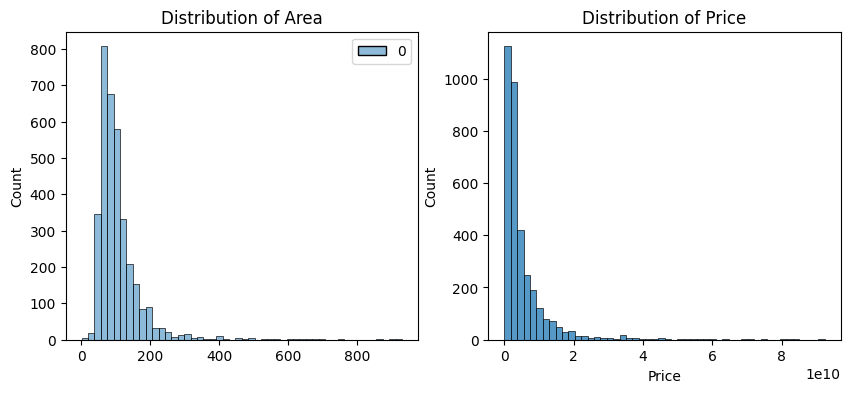

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
sns.histplot(df['Area'].astype(str).str.extract(r'(\d+)').dropna().astype(float), bins=50, ax=axes[0])
axes[0].set_title('Distribution of Area')

sns.histplot(df['Price'], bins=50, ax=axes[1])
axes[1].set_title('Distribution of Price')

plt.show()

### Countplot for Address top 20

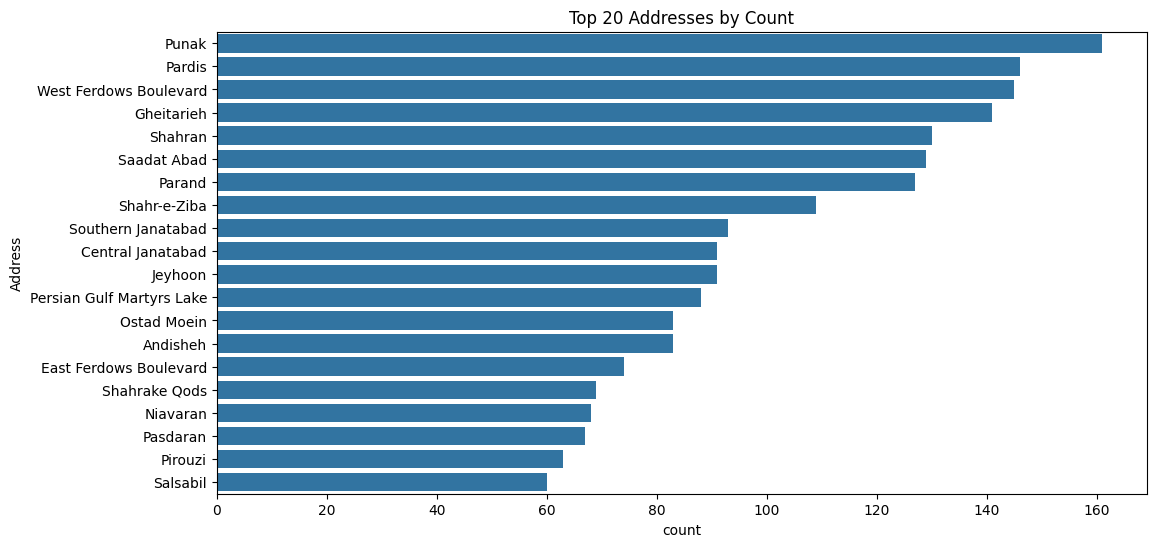

In [31]:
plt.figure(figsize=(12,6))
top_addresses = df['Address'].value_counts().nlargest(20).index
sns.countplot(data=df[df['Address'].isin(top_addresses)], y='Address', order=top_addresses)
plt.title('Top 20 Addresses by Count')
plt.show()

### Average Price per Address top 20

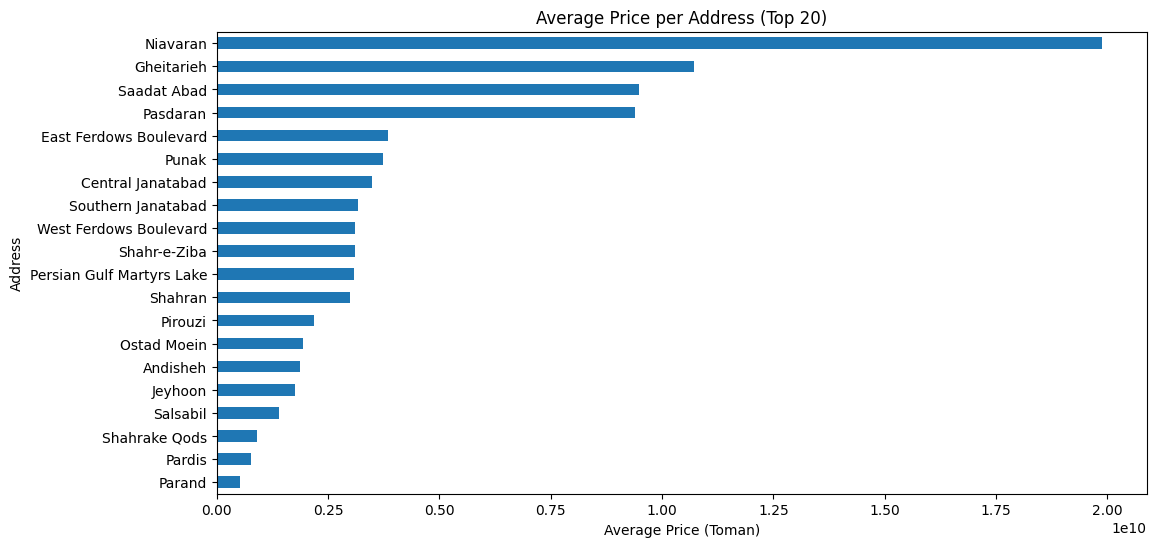

In [32]:
plt.figure(figsize=(12,6))
avg_price = df.groupby('Address')['Price'].mean().loc[top_addresses]
avg_price.sort_values().plot(kind='barh')
plt.title('Average Price per Address (Top 20)')
plt.xlabel('Average Price (Toman)')
plt.show()

### Correlation heatmap for numeric features

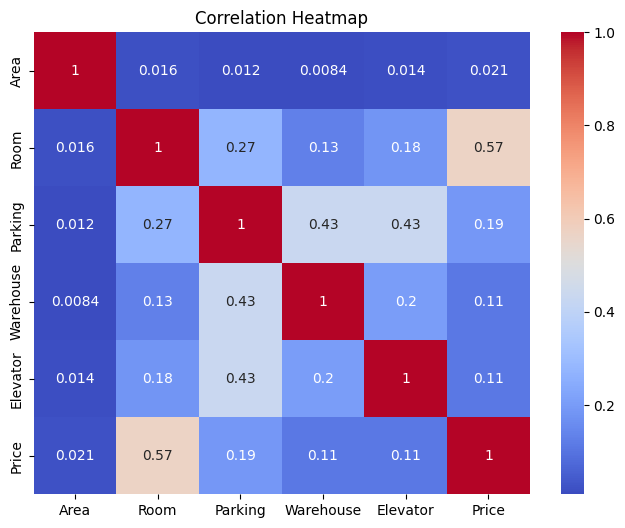

In [34]:
df_corr = df.copy()

for col in ['Parking', 'Warehouse', 'Elevator']:
    df_corr[col] = df_corr[col].astype(int)

df_corr['Price'] = df_corr['Price'].astype(str).str.replace(',', '').astype(float)
df_corr['Area'] = df_corr['Area'].astype(str).str.replace(',', '').astype(float)

corr = df_corr[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Price']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


---
# **Step 3: Data Cleaning**

Performed data cleaning to prepare the dataset for modeling.

### Cleaning actions:
- Removed rows with missing `Address` (23 rows).
- Converted `Area` column to numeric; removed rows with missing or unrealistic values (greater than 1000 sqm).
- Removed commas from `Price` column and converted to `float`.
- Converted boolean columns (`Parking`, `Warehouse`, `Elevator`) to `int` (0/1) for modeling.
- Dropped `Price(USD)` column since it is not relevant to the target variable.
- Reset index after cleaning.

### Final dataset shape:
- Original rows: 3479  
- Cleaned rows: 3450  

### Final columns:
- `Area`, `Room`, `Parking`, `Warehouse`, `Elevator`, `Address`, `Price`


In [39]:
# Make an explicit copy to avoid SettingWithCopyWarning
df_clean = df.dropna(subset=['Address']).copy()

# Convert Area column to numeric, set invalid parsing as NaN
df_clean.loc[:, 'Area'] = pd.to_numeric(df_clean['Area'], errors='coerce')

# Remove rows with missing Area or unrealistic Area values (> 1000 sqm)
df_clean = df_clean.dropna(subset=['Area'])
df_clean = df_clean[df_clean['Area'] <= 1000]

# Convert boolean columns to integers (0/1)
bool_cols = ['Parking', 'Warehouse', 'Elevator']
for col in bool_cols:
    df_clean[col] = df_clean[col].astype(int)
    
# Remove commas from Price column and convert to float
df_clean.loc[:, 'Price'] = df_clean['Price'].astype(str).str.replace(',', '').astype(float)

# Drop Price(USD) column since it is not used in this project
df_clean = df_clean.drop(columns=['Price(USD)'])

# Reset index after cleaning
df_clean = df_clean.reset_index(drop=True)

In [40]:
print(f'Original rows: {len(df)}')
print(f'Cleaned rows: {len(df_clean)}')

Original rows: 3479
Cleaned rows: 3450


In [41]:
df_clean.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63.0,1,1,1,1,Shahran,1.850000e+09
1,60.0,1,1,1,1,Shahran,1.850000e+09
2,79.0,2,1,1,1,Pardis,5.500000e+08
3,95.0,2,1,1,1,Shahrake Qods,9.025000e+08
4,123.0,2,1,1,1,Shahrake Gharb,7.000000e+09
